In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [3]:
clean_df = pd.read_csv('df_after_cols_reduction.csv').iloc[:,1:]
clean_df.shape

(10070, 1795)

In [6]:
cat_cols = ['company_name','company_about', 'founded', 'business model','employees','product stage','status','fund_stage','suceeded']
num_cols = ['total_raised','total_rounds', 'investors','ipo_price', 'geo_market_per']
tag_cols = [col for col in clean_df.columns if col.startswith('tag_')]
targetmarket_cols = [col for col in clean_df.columns if col.startswith('targetmarket_')]
sector_list = [col for col in clean_df.columns if col.startswith("sector_")]
target_ind_list = [col for col in clean_df.columns if col.startswith("industry_")]
technology_list = [col for col in clean_df.columns if col.startswith("technology_")]
bin_cols = tag_cols + targetmarket_cols + sector_list + target_ind_list + technology_list

In [7]:
print("Number of categorical columns: ", len(cat_cols))
print("Number of numerical columns: ", len(num_cols))
print("Number of binary columns: ", len(bin_cols))


Number of categorical columns:  9
Number of numerical columns:  5
Number of binary columns:  1781


In [25]:
pca_cols = bin_cols + ['geo_market_per']
'geo_market_per' in pca_cols

True

In [40]:
pca = PCA(n_components=2)
bin_df = pca.fit_transform(clean_df[])
# pca_components = pca.components_
bin_df.shape


PCA(n_components=2)

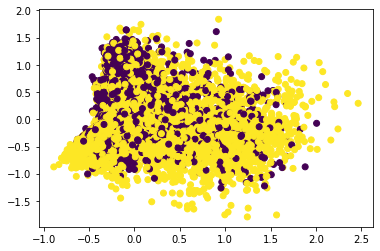

In [96]:
# plot PCA results
plt.scatter(bin_df[:,0], bin_df[:,1], c=clean_df['status'])


In [118]:
#  function to plot the PCA components
def plot_pca_components(df, cols, n_components=2):
    """
    Plot the PCA components
    """

    pca = PCA(n_components=n_components).fit_transform(df[cols])
    print(pca.shape)
    # plt.figure(figsize=(8,8))
    plt.scatter(pca[:,0], pca[:,1], c=clean_df['suceeded']) #marker='o', s=50)
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    # plt.show()
    # plt.show()
    return plt

(10070, 2)


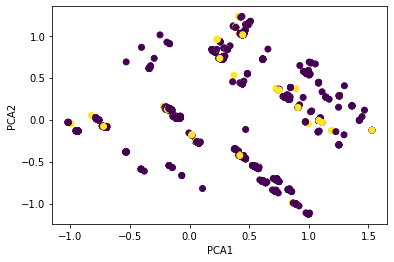

In [103]:
#  plot the PCA components
plot_pca_components(clean_df, sector_list, 2)

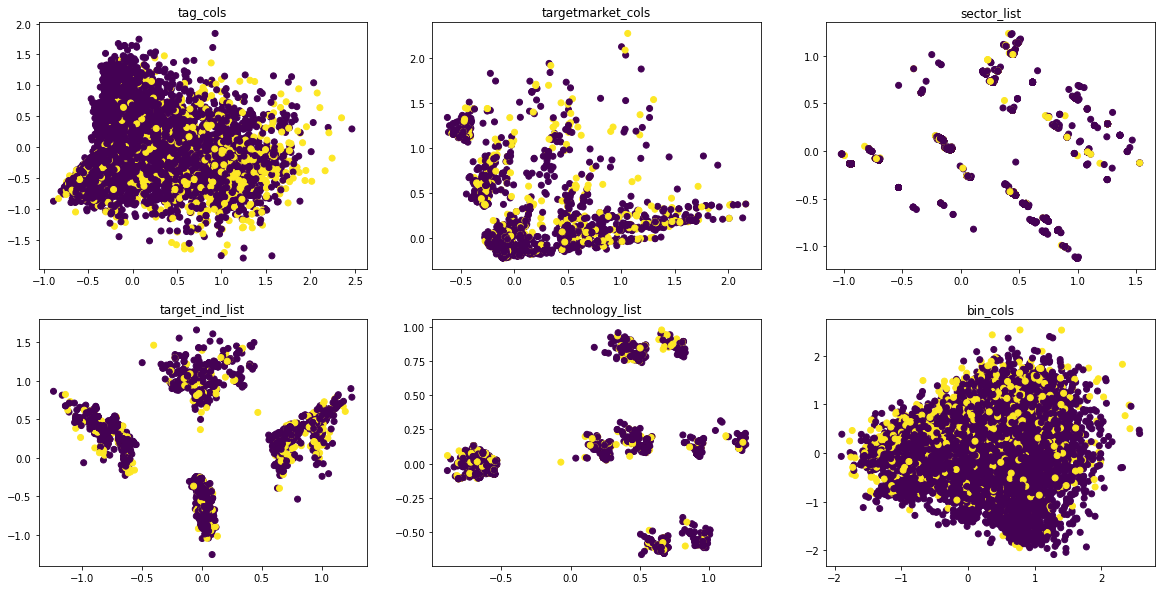

In [120]:
import math
cols_dic = {'tag_cols':tag_cols, 'targetmarket_cols':targetmarket_cols, 'sector_list':sector_list, 'target_ind_list':target_ind_list, 'technology_list':technology_list, 'bin_cols':bin_cols} 
number_of_plot_cols = 3
number_of_plot_rows = 0
if len(cols_dic) % 3 == 0:
    number_of_plot_rows = int(len(cols_dic) / 3)
else:
    number_of_plot_rows = int(math.floor(len(cols_dic) / 3) + 1)

fig, axes = plt.subplots(number_of_plot_rows,number_of_plot_cols, figsize=(20,10))
k = 0
for i in range(number_of_plot_rows):
    for j in range(number_of_plot_cols):
        pca = PCA(n_components=2).fit_transform(clean_df[list(cols_dic.values())[k]])
        axes[i,j].scatter(pca[:,0], pca[:,1], c=clean_df['suceeded'])
        axes[i,j].set_title(list(cols_dic.keys())[k])
        k += 1
    
plt.show()